In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, A, B, C): return A*np.e**(B * x) -C

Text(0.05, 0.1, 'If the equation is $I = Ae^{BV} - C$,\nthen the values of A, B and C are:\n\t$A = -20.8956$\n\t$B = 4.4113$\n\t$C = -1007.9800$\n')

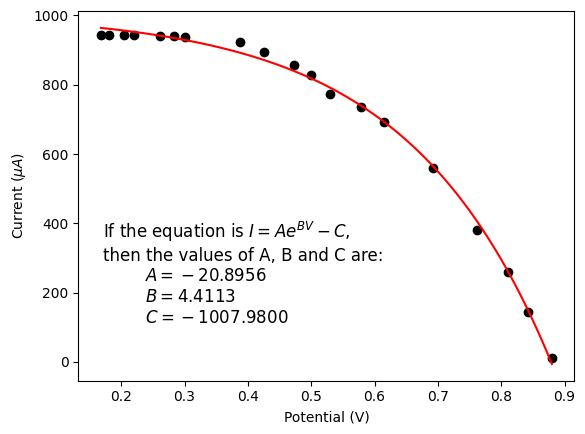

In [2]:
x = [0.88, 0.843, 0.81, 0.762, 0.693, 0.615, 0.579, 0.53, 0.5, 0.473, 0.425, 0.388, 0.3, 0.284, 0.261, 0.22, 0.204, 0.18, 0.168]
y = [10.6, 143.2, 259.5, 381.5, 560, 693, 737, 773, 829, 856, 896, 923, 939, 941, 942, 943, 944, 945, 945]
y_copy = y

A = -20.8956
B = 4.41135
C = -1007.98

x_ = np.linspace(min(x), max(x), 100)
y_ = func(x_, A, B, C)

plt.plot(x, y, 'ko')
plt.plot(x_, y_, 'r')
plt.xlabel('Potential (V)')
plt.ylabel(r'Current $(\mu A)$')

text = r"If the equation is $I = Ae^{BV} - C$," + "\nthen the values of A, B and C are:\n"
text += f"\t$A = {A:.4f}$\n"
text += f"\t$B = {B:.4f}$\n"
text += f"\t$C = {C:.4f}$\n"
# print(text)

plt.text(0.05, 0.1, text, fontsize=12, transform=plt.gca().transAxes)

In [3]:
func(0, A, B, C)

987.0844

In [4]:
x_p = [0.731, 0.696, 0.661, 0.626, 0.591, 0.556, 0.521, 0.486, 0.450, 0.415, 0.380, 0.345, 0.310, 0.275, 0.240, 0.205, 0.170]
y_p = [7, 91, 145, 211, 218, 292, 332, 388, 418, 460, 502, 554, 589, 592, 620, 596, 637]
x_g = [0.521, 0.481, 0.441, 0.402, 0.361, 0.322, 0.282, 0.242, 0.202, 0.162, 0.124, 0.082, 0.044]
y_g = [2, 26, 69, 86, 121, 145, 176, 201, 198, 211, 246, 243, 280]
x_r = [0.553, 0.513, 0.475, 0.436, 0.398, 0.360, 0.320, 0.281, 0.243, 0.204, 0.166, 0.128, 0.089, 0.049]
y_r = [27, 80, 116, 156, 169, 193, 240, 248, 283, 285, 294, 313, 318, 342]
x_y = [0.715, 0.675, 0.634, 0.593, 0.554, 0.513, 0.472, 0.432, 0.39, 0.35, 0.31, 0.27, 0.229, 0.19, 0.148, 0.107]
y_y = [21, 119, 244, 312, 431, 485, 541, 560, 651, 674, 759, 710, 777, 798, 822, 831]

#        A        B         C      parameters for colour
p = [-177.761, 2.21937, -910.311]  # - pink
g = [-138.674, 2.13786, -420.601]  # - green
r = [-66.7210, 3.15921, -413.279]  # - red
y = [-86.4733, 3.34558, -959.201]  # - yellow

Text(0, 0.5, 'Current $(\\mu A)$')

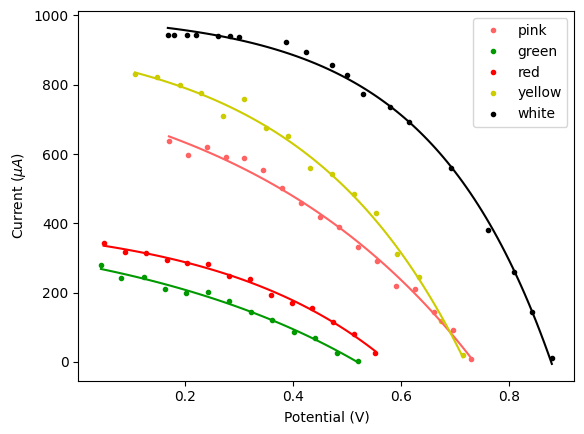

In [5]:
plt.plot(x_p, y_p, '#FF6363', marker=".", linestyle=" ", label='pink')
plt.plot(x_g, y_g, '#009900', marker=".", linestyle=" ", label='green')
plt.plot(x_r, y_r, '#FF0000', marker=".", linestyle=" ", label='red')
plt.plot(x_y, y_y, '#cccc00', marker=".", linestyle=" ", label='yellow')

plt.plot(x, y_copy, 'k.', label='white')
plt.plot(x_, y_, 'k')


x_p_ = np.linspace(min(x_p), max(x_p), 100)
plt.plot(x_p_, func(x_p_, *p), '#FF6363')
x_g_ = np.linspace(min(x_g), max(x_g), 100)
plt.plot(x_g_, func(x_g_, *g), '#009900')
x_r_ = np.linspace(min(x_r), max(x_r), 100)
plt.plot(x_r_, func(x_r_, *r), '#FF0000')
x_y_ = np.linspace(min(x_y), max(x_y), 100)
plt.plot(x_y_, func(x_y_, *y), '#cccc00')

plt.legend()
plt.xlabel('Potential (V)')
plt.ylabel(r'Current $(\mu A)$')

In [6]:
i = 2
for col in [p, g, r, y]:
    print(col[i])

-910.311
-420.601
-413.279
-959.201


In [7]:
print(func(0, *p))
print(func(0, *g))
print(func(0, *r))
print(func(0, *y))

732.5500000000001
281.927
346.558
872.7277


In [8]:
def root(func, A, B, C):
    x = 0
    dx = 0.1
    fwd = True
    while True:
        pred = func(x, A, B, C)
#         print(x, pred)
        if abs(pred) < 1e-6:
            return x
        if pred>0:
            if not fwd: dx /= 10
            x += dx
            fwd = True
        if pred<0:
            if fwd: dx /= 10
            x -= dx
            fwd = False

In [9]:
print(root(func, *p))
print(root(func, *g))
print(root(func, *r))
print(root(func, *y))

0.7359504489999985
0.5190044179999989
0.5772339169999985
0.7192370085999988


In [10]:
root(func, A, B, C)

0.8786799949999988

In [16]:
def pmax(A, B, C, func = func):
    V = np.linspace(0, 1.6, 1000)
    I = func(V, A, B, C)/1000_000
    # i = np.argmax(V*I)
    return (V*I).max()/1000

In [24]:
print(pmax(A, B, C)*10**9)
print(pmax(*p)*10**9)
print(pmax(*g)*10**9)
print(pmax(*r)*10**9)
print(pmax(*y)*10**9)


428.27804373582643
192.94256641571306
47.22105464859233
74.12268692506521
256.3123139198343
